# Центральная предельная теорема - Распределение Лапласа

In [59]:
%matplotlib inline
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

Выбрано распределение Лапласа с параметрами alpha = 0.0 и beta = 2.0. 

Ссылка на Wiki: https://en.wikipedia.org/wiki/Laplace_distribution

In [60]:
a = 0.0
b = 2.0

Определяю параметры функции stats.laplace на основе а и б.

In [61]:
laplace_rv = stats.laplace(a, b)

Распределение Лапласа и выборка из него с n = 1000.

In [62]:
sample_laplace =  laplace_rv.rvs(1000)

Сглаженная функцию плотности для выборки (KDE), теоретическая плотность для данного распределения и гистограмма.

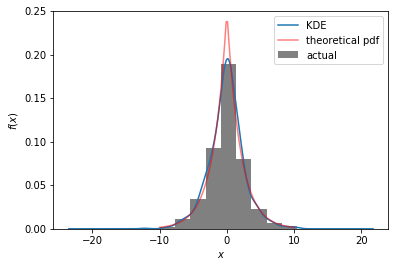

In [64]:
x = np.linspace(-10,10, 100)
pdf = laplace_rv.pdf(x)

df = pd.DataFrame(sample_laplace, columns=['KDE'])
ax = df.plot(kind='density')
 
plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)
plt.hist(sample_laplace,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Формула ЦПТ:

$$ \bar{X} \backsim N(\mu,\frac{\sigma^2}{n})  $$

Для распределения Лапласа среднее и дисперсия определены следующим образом: 

$$\mu = \mu $$ 

$$\sigma^2 = 2b^2 $$


Применяю эти параметры, чтобы сравнивать получаемые опытным путем параметры с правилами ЦПТ.

In [67]:
mu = a
variance = 2*b**2
sigma = sqrt(variance)
print 'mu = {:.2f},  sigma = {:.2f}'.format(mu, sigma)

mu = 0.00,  sigma = 2.83


Функция для генерации выборок и подсчета выборочных средних. 

In [68]:
def generation_samples(size_of_n, num_of_gen = 1000):
    gen_of_mean_sam = []
    for i in range(num_of_gen):
        result_of_gen = laplace_rv.rvs(size_of_n)
        gen_of_mean_sam.append(np.mean(result_of_gen))
    
    se = sigma/sqrt(size_of_n) # стандартная ошибка среднего
    
    norm_rv = stats.norm(mu,se)
 
    plt.hist(gen_of_mean_sam,normed=True,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

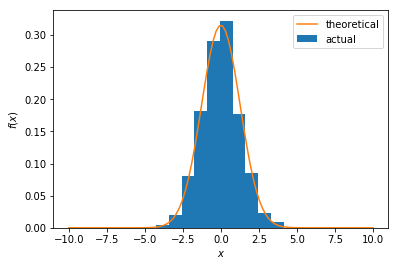

In [69]:
   generation_samples(5)

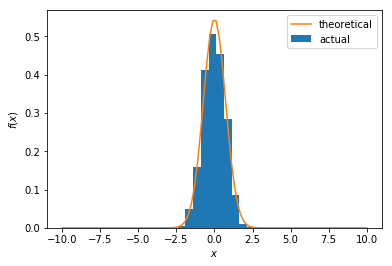

In [70]:
   generation_samples(15)

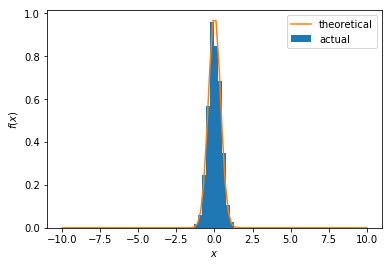

In [71]:
   generation_samples(50)

В результате видно что ЦПТ работает. Даже при маленьком размере выбрки среднее уже приближено. При увеличении размера выборки распределение приближается к нормальному распределению, что говорит об увеличение точности оценки. В цифровом виде это можно выразить через доверительный интервал - видно, что с увеличением n он сужается.